# Classify Therapy Response By Qiaoying Zhang

## Import Libraries

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

## Loading Data

In [2]:
data = pd.read_csv('Sheet_1.csv', encoding='latin1')
data = pd.concat([data['class'],data['response_text']], axis=1)

data.dropna(axis=0, inplace =True) # clean data

data

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


## Binary Labeling

In [3]:
data['class'] = [1 if c == 'flagged' else 0 for c in data['class']]

data.head()

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...


In [4]:
class_count = data['class'].value_counts()
class_count

class
0    55
1    25
Name: count, dtype: int64

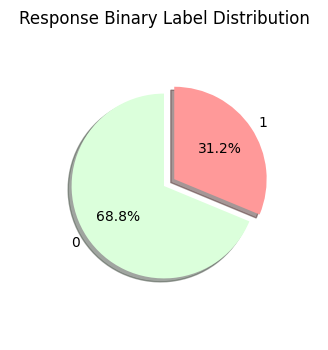

In [5]:
explode = (0, 0.1)
label = class_count.values
count = class_count.index

# Visualize response distribution
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(label, explode=explode, labels=count, autopct='%1.1f%%', radius=0.75,
        shadow=True, startangle=90, colors=['#dbffdb', '#ff9999'])
ax.set_title('Response Binary Label Distribution')

plt.show()

## Vectorize Simplified Text

In [6]:
def simplify(text):
    # simplify and remove irrelevant words
    result = re.sub('[^a-zA-Z]',' ', text).lower() # remove non-letter characters
    result = nltk.word_tokenize(result)
    result = [w for w in result if not w in set(stopwords.words('english'))]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    result = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(w, 'n'), pos='v'), pos='a') for w in result)
    
    return ' '.join(result)

In [7]:
simple_txt = []

for t in data.response_text:
    simple_txt.append(simplify(t))
    
simple_txt[:10]

['try avoid sort conflict',
 'friend open mental addiction weed take life make depress',
 'save girl suicide go swallow bunch pill talk calm love way',
 'cant think one really think may indirectly',
 'really one friend fit category therapist call spiral anyway pretty much call time frustrate something boyfriend ask logical would fight would call crazy ask ok say please say hand remote',
 'couple year ago friend go switch school low self esteem help overcome shit',
 'roommate go death loss gf anything get bedroom',
 'couple friend could say friend quite severe depression emotional problem help eventually relationship start suffer result personal problem',
 'listen someone talk relationship trouble offer advice personal experience',
 'always listen comfort sister lose virgity night walk boyfriend cut parent find throw house part simply bring supportive focus']

In [8]:
max_features = 100
vectorizer = CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(simple_txt).toarray()
y = data.iloc[:, 0].values
features = vectorizer.get_feature_names_out()

print('Top {} Most Used Words: {}'.format(max_features, features))

Top 100 Most Used Words: ['addiction' 'advice' 'alone' 'always' 'anxiety' 'anything' 'back' 'best'
 'bring' 'call' 'care' 'come' 'comfort' 'could' 'deal' 'depression'
 'describe' 'dont' 'end' 'even' 'everything' 'experience' 'face' 'feel'
 'find' 'friend' 'get' 'gf' 'girl' 'girlfriend' 'give' 'go' 'good' 'grade'
 'happen' 'help' 'helpful' 'issue' 'kid' 'kill' 'know' 'last' 'let' 'life'
 'like' 'listen' 'little' 'look' 'lot' 'make' 'many' 'may' 'much' 'need'
 'never' 'night' 'offer' 'often' 'one' 'open' 'others' 'people' 'person'
 'personal' 'pretty' 'problem' 'really' 'relationship' 'say' 'school'
 'see' 'self' 'severe' 'share' 'shit' 'similar' 'simply' 'situation'
 'someone' 'sometimes' 'start' 'struggle' 'stuff' 'suicide' 'support'
 'talk' 'tell' 'think' 'though' 'time' 'trouble' 'try' 'use' 'want' 'way'
 'week' 'well' 'work' 'would' 'year']


In [9]:
lengths = data.response_text.str.len()
argmax = np.where(lengths == lengths.max())[0]

# visualize the longest response from train data
print('\033[1m' + 'Longest response: ' + '\033[0m')
data.iloc[argmax]

Longest response: 


,class,response_text
48,1,I had a friend that would go off about girls a...


In [10]:
simple_txt[48]

'friend would go girl get super depress tell go kill one night drive n hour half go look cop already take hospital friend go hang also help try talk another person hadnt friend year cause stuff call blue thankgiving last year call back get hospital number know something end kid friend year huge douche psych ward try kill get hold talk whenever would call would answer even though still shit year early mind people might want around situation like people goal purpose life sustain survival help make people life little bite good make people laugh sad help people nobody else basically treat human even strange respect kindness friend people need sometime let people talk shit offer helpful advice still swim shit enough keep go keep little light end tunnel switch idk long last till flicker'

In [11]:
print('\033[1m' + 'Example vectorized response: ' + '\033[0m')
X[48]

Example vectorized response: 


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 5, 3, 0, 1, 0, 0, 5, 1, 0, 0, 3, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 7, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 3, 4], dtype=int64)

## Train Model (Accuracy Comparison)

In [12]:
print('\033[1m' + 'Dimension of X: {}, Dimension of y: {}'.format(X.shape, y.shape) + '\033[0m')

Dimension of X: (80, 100), Dimension of y: (80,)


In [13]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf_lst = ['Soft Vector Machine', 'Naive Bayes', 'AdaBoost', 'Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression']
accuracies = []

### <font color='magenta'><b>Soft Vector Machine(SVM)</b></font>
Support Vector Machine (SVM) is a machine learning algorithm that finds the optimal hyperplane to separate data into distinct classes while maximizing the margin between them.

In [15]:
svm = SVC()
svm.fit(x_train, y_train)
accuracy_svm = svm.score(x_test, y_test)
accuracies.append(accuracy_svm)
print('Soft Vector Machine Accuracy: {:.2f}'.format(accuracy_svm))

Soft Vector Machine Accuracy: 0.81


### <font color='magenta'><b>Naive Bayes</b></font>
Naive Bayes is a probabilistic machine learning algorithm that applies Bayes' theorem with the "naive" assumption of independence among features to classify data into different categories or classes based on the likelihood of observed features.

In [16]:
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy_nb = nb.score(x_test, y_test)
accuracies.append(accuracy_nb)
print('Gaussian Naive Bayes Accuracy: {:.2f}'.format(accuracy_nb))

Gaussian Naive Bayes Accuracy: 0.75


### <font color='magenta'><b>AdaBoost</b></font>
AdaBoost, or Adaptive Boosting, is an ensemble machine learning technique that combines multiple weak learners into a strong learner by assigning varying weights to data points, focusing on difficult-to-classify examples during each iteration to improve classification accuracy.

In [17]:
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(x_train, y_train)
accuracy_ab = nb.score(x_test, y_test)
accuracies.append(accuracy_ab)
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_nb))

AdaBoost Accuracy: 0.75


### <font color='magenta'><b>Decision Tree</b></font>
A Decision Tree is a machine learning algorithm that recursively splits data into subsets based on the most significant feature, creating a tree-like structure to make decisions by following a path from the root to a leaf node.

In [18]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy_dt = dt.score(x_test, y_test)
accuracies.append(accuracy_dt)
print('Decision Tree Accuracy: {:.2f}'.format(accuracy_dt))

Decision Tree Accuracy: 0.75


### <font color='magenta'><b>K-Nearest Neighbors</b></font>
K-Nearest Neighbors (K-NN) is a simple machine learning algorithm that classifies data points based on the majority class of their nearest neighbors in a feature space, making predictions by finding the K closest data points and assigning the class that appears most frequently among them.

In [19]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)
accuracy_kn = kn.score(x_test, y_test)
accuracies.append(accuracy_kn)
print('K-Nearest Neighbors Accuracy: {:.2f}'.format(accuracy_kn))

K-Nearest Neighbors Accuracy: 0.88


### <font color='magenta'><b>Random Forest</b></font>
Random Forest is an ensemble machine learning method that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting in classification and regression tasks.

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy_rf = rf.score(x_test, y_test)
accuracies.append(accuracy_rf)
print('Random Forest Accuracy: {:.2f}'.format(accuracy_rf))

Random Forest Accuracy: 0.81


### <font color='magenta'><b>Logistic Regression</b></font>
Logistic Regression is a statistical and machine learning model used for binary classification that estimates the probability of a data point belonging to one of two classes by fitting a logistic curve to the data.

In [21]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy_logreg = logreg.score(x_test, y_test)
accuracies.append(accuracy_logreg)
print('Logistic Regression Accuracy: {:.2f}'.format(accuracy_logreg))

Logistic Regression Accuracy: 0.69


In [22]:
df = pd.DataFrame(dict(classifiers=clf_lst, accuracies=accuracies))
df_sorted = df.sort_values('accuracies')

df_sorted

,classifiers,accuracies
6,Logistic Regression,0.6875
1,Naive Bayes,0.7500
2,AdaBoost,0.7500
3,Decision Tree,0.7500
0,Soft Vector Machine,0.8125
5,Random Forest,0.8125
4,KNN,0.8750


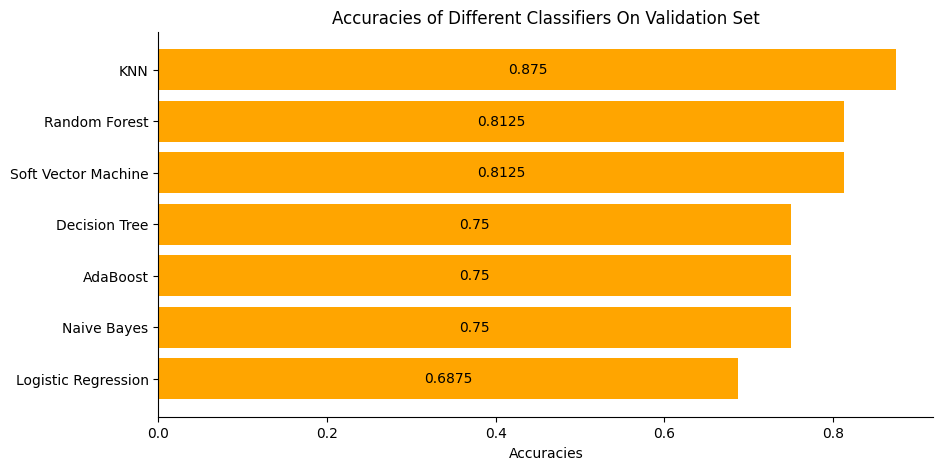

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

hbars = ax.barh('classifiers', 'accuracies', data=df_sorted, color='orange')
ax.bar_label(hbars, label_type='center')
ax.set_xlabel('Accuracies')
ax.set_title('Accuracies of Different Classifiers On Validation Set')
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Test Model

In [24]:
## Bot question: 'Describe a time when you have acted as a resource for someone else'.
# corpus contain responses generated by ChatGPT
# result should be something like: 1 0 0 1 1 0 0 1 1

corpus = [
    'I once played a crucial role as a resource for a dear friend who found herself in an incredibly distressing situation. She had been drugged at a party, which led to an unwanted pregnancy and want to suicide. In this trying moment, I became her confidant, offering a non-judgmental listening ear, empathy, and emotional support. I encouraged her to confide in her family and seek professional help, guiding her to a therapist who specialized in such cases. Together, we navigated the challenging journey towards recovery, and I witnessed her transformation from despair to hope and healing.',
    'My friend told me she\'s not focusing in school so I invited her to study with me.',
    'I have never been a resource for anyone.',
    'I remember a time when a close friend was going through a tough period of depression. They confided in me, and I acted as a resource by lending a listening ear and offering support. We had many meaningful conversations, both in person and over email, to help them navigate their emotions and find a way toward recovery.',
    'My friends was offered weed and got addicted, so I had to bring him to a specialized hospital.',
    'My friend told me she felt small years ago, we talked and she\' better now.',
    'While volunteering at a local shelter, I had the opportunity to be a resource for several homeless individuals. I offered a listening ear, provided food and shelter, and helped them connect with relevant social services. It was incredibly rewarding to see them regain hope and work towards a more stable life.',
    'A close family member recently experienced the loss of a loved one, and I was able to be a resource for them by providing emotional support and sharing stories that brought back positive memories, offering some relief during an otherwise difficult period.',
    'During my time as a junior in college, a classmate of mine was dealing with substance abuse issues. They reached out for advice on how to overcome their addiction. I shared my knowledge and connected them with relevant resources, ultimately helping them embark on their path to recovery.'
]

test_txt = []

for t in corpus:
    test_txt.append(simplify(t))
    
test_txt

['play crucial role resource dear friend find incredibly distress situation drug party lead unwanted pregnancy want suicide try moment become confidant offer non judgmental listen ear empathy emotional support encourage confide family seek professional help guide therapist specialize case together navigate challenge journey towards recovery witness transformation despair hope heal',
 'friend tell focus school invite study',
 'never resource anyone',
 'remember time close friend go tough period depression confide act resource lend listen ear offer support many meaningful conversation person email help navigate emotion find way toward recovery',
 'friend offer weed get addict bring specialize hospital',
 'friend tell felt small year ago talk good',
 'volunteer local shelter opportunity resource several homeless individual offer listen ear provide food shelter help connect relevant social service incredibly reward see regain hope work towards stable life',
 'close family member recently e

In [25]:
m = len(test_txt)
test_vectors = np.zeros((m, max_features))

# vectorize corpus features with respect to train data
for i in range(m):
    for w in test_txt[i].split():
        if w in features:
            test_vectors[i][np.where(features == w)] += 1
            
test_vectors.shape

(9, 100)

## Model Prediction Results

In [26]:
predictions = []

# get prediction of corpus from pre-trained model
predictions.append(svm.predict(test_vectors))
predictions.append(nb.predict(test_vectors))
predictions.append(ab.predict(test_vectors))
predictions.append(dt.predict(test_vectors))
predictions.append(kn.predict(test_vectors))
predictions.append(rf.predict(test_vectors))
predictions.append(logreg.predict(test_vectors))

for i in range(len(predictions)):
    print('{} predictions: {}'.format(clf_lst[i], predictions[i]))

Soft Vector Machine predictions: [0 0 0 0 0 0 0 0 0]
Naive Bayes predictions: [1 0 0 1 0 0 0 1 1]
AdaBoost predictions: [1 0 0 1 1 0 0 1 1]
Decision Tree predictions: [1 0 0 1 1 0 0 0 1]
KNN predictions: [0 0 0 0 0 0 0 0 0]
Random Forest predictions: [1 0 0 1 1 0 0 1 1]
Logistic Regression predictions: [0 0 0 1 1 0 0 0 0]


### Accuracy

In [27]:
result = [1, 0, 0, 1, 1, 0, 0, 1, 1]
clf_accuracies = []

for i in range(len(predictions)):
    correct = predictions[i] == result
    clf_accuracies.append(sum(correct)/len(correct))
    print('{} prediction accuracy: {}'.format(clf_lst[i], clf_accuracies[i]))

Soft Vector Machine prediction accuracy: 0.4444444444444444
Naive Bayes prediction accuracy: 0.8888888888888888
AdaBoost prediction accuracy: 1.0
Decision Tree prediction accuracy: 0.8888888888888888
KNN prediction accuracy: 0.4444444444444444
Random Forest prediction accuracy: 1.0
Logistic Regression prediction accuracy: 0.6666666666666666


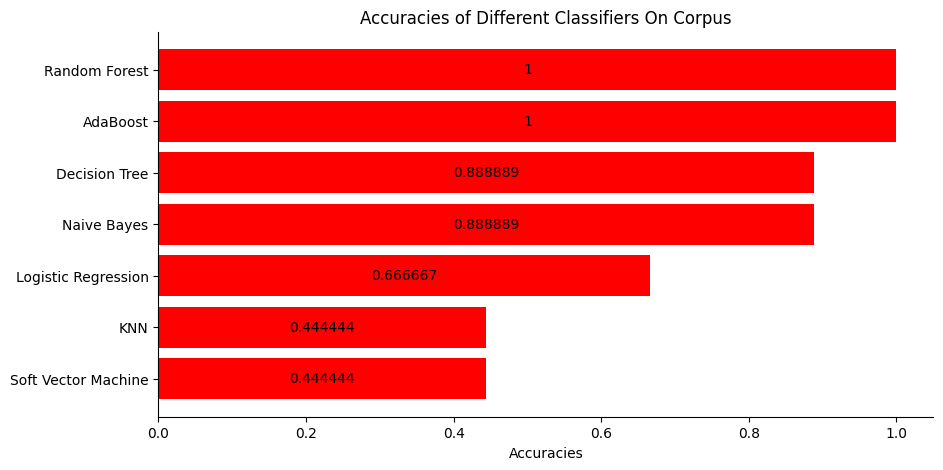

In [28]:
df = pd.DataFrame(dict(classifiers=clf_lst, accuracies=clf_accuracies))
df_sorted = df.sort_values('accuracies')

fig, ax = plt.subplots(figsize=(10, 5))

hbars = ax.barh('classifiers', 'accuracies', data=df_sorted, color='red')
ax.bar_label(hbars, label_type='center')
ax.set_xlabel('Accuracies')
ax.set_title('Accuracies of Different Classifiers On Corpus')
ax.spines[['right', 'top']].set_visible(False)

plt.show()

## Feature Occurance (Build Personal Classifier)

In [29]:
# get word:count dictionary
def get_occurance(txt):
    res = {features[i]: txt[i] for i in range(max_features)}
    return {x:y for x, y in res.items() if y!=0}

In [30]:
# feature occurance of flagged text from train data
ori_flag_txt = sum(sum([X[i] for i in list(np.where(data['class'] == 1))]))
ori_flag_feat = get_occurance(ori_flag_txt)
ori_flag_txt

array([ 5,  2,  2,  2,  5,  2,  4,  5,  1,  3,  2,  3,  3,  3,  4,  7,  2,
        0,  3,  2,  3,  3,  2,  0,  4, 24,  9,  2,  3,  2,  2, 14,  3,  1,
        2, 14,  2,  4,  1,  4,  2,  3,  2,  5,  3,  3,  2,  2,  0,  5,  3,
        1,  3,  3,  1,  3,  2,  0,  5,  1,  0, 11,  2,  3,  1,  2,  0,  1,
        3,  5,  1,  2,  3,  2,  3,  1,  3,  1,  0,  0,  2,  1,  2,  3,  3,
       11,  2,  4,  3,  3,  1,  8,  4,  3,  3,  0,  1,  1,  6,  6],
      dtype=int64)

In [31]:
# feature occurance of unflagged text from train data
ori_unflag_txt = sum(sum([X[i] for i in list(np.where(data['class'] == 0))]))
ori_unflag_feat = get_occurance(ori_unflag_txt)
ori_unflag_txt

array([ 0,  3,  1,  6,  0,  1,  1,  2,  2,  4,  2,  6,  0,  1,  2,  0,  1,
        3,  0,  3,  0,  2,  2,  9,  1, 27,  4,  1,  5,  3,  3, 10,  4,  2,
        1, 19,  2,  4,  3,  0,  7,  0,  4,  6,  1,  9,  1,  2,  6,  2,  2,
        2,  3,  6,  3,  0,  1,  3,  4,  4,  3, 11,  1,  1,  2,  7,  5,  2,
        2,  3,  2,  1,  0,  1,  3,  2,  1,  4,  7,  4,  1,  4,  3,  0,  1,
       14,  3,  7,  1,  4,  3,  6,  1,  3,  2,  3,  4,  2,  3,  2],
      dtype=int64)

In [32]:
# get positive feature
pos_feat = [k for k in ori_unflag_feat.keys() if k in ori_flag_feat.keys() and ori_unflag_feat[k] > ori_flag_feat[k]]
pos_feat += [k for k in ori_unflag_feat.keys() if k not in ori_flag_feat.keys()]
print('\033[1m' + 'Possible Positive Features in Given Data: {}'.format(pos_feat) + '\033[0m')

Possible Positive Features in Given Data: ['advice', 'always', 'bring', 'call', 'come', 'even', 'friend', 'girl', 'girlfriend', 'give', 'good', 'grade', 'help', 'kid', 'know', 'let', 'life', 'listen', 'may', 'need', 'never', 'open', 'pretty', 'problem', 'relationship', 'see', 'similar', 'situation', 'struggle', 'stuff', 'talk', 'tell', 'think', 'time', 'trouble', 'well', 'work', 'dont', 'feel', 'lot', 'often', 'others', 'really', 'someone', 'sometimes', 'week']


In [33]:
# get neutral feature
neu_feat = [k for k in ori_unflag_feat.keys() if k in ori_flag_feat.keys() and ori_unflag_feat[k] <= ori_flag_feat[k]]
print('\033[1m' + 'Possible Neutral Features in Given Data: {}'.format(neu_feat) + '\033[0m')

Possible Neutral Features in Given Data: ['alone', 'anything', 'back', 'best', 'care', 'could', 'deal', 'describe', 'experience', 'face', 'find', 'get', 'gf', 'go', 'happen', 'helpful', 'issue', 'like', 'little', 'look', 'make', 'many', 'much', 'offer', 'one', 'people', 'person', 'personal', 'say', 'school', 'self', 'share', 'shit', 'simply', 'start', 'support', 'though', 'try', 'use', 'want', 'way', 'would', 'year']


In [34]:
# get negative feature
neg_feat = [k for k in ori_flag_feat.keys() if k not in ori_unflag_feat.keys()]
print('\033[1m' + 'Possible Negative Features in Given Data: {}'.format(neg_feat) + '\033[0m')

Possible Negative Features in Given Data: ['addiction', 'anxiety', 'comfort', 'depression', 'end', 'everything', 'kill', 'last', 'night', 'severe', 'suicide']


In [35]:
len(pos_feat)+len(neu_feat)+len(neg_feat)

100

In [36]:
flag_txt = sum([test_vectors[i] for i in [0, 3, 4, 7, 8]])
flag_txt

array([1., 1., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 2., 3., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 4., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 3.,
       0., 0., 0., 0., 2., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

## Visualize Feature Occurance Distribution

In [37]:
cor_flag_feat = get_occurance(flag_txt)
cor_flag_feat

dic = []
for i in range(m):
    pos = []
    neu = []
    neg = []
    
    for w in test_txt[i].split():
        if w in features:
            if w in pos_feat:
                pos.append(w)
            elif w in neu_feat:
                neu.append(w)
            elif w in neg_feat:
                neg.append(w)
                
    dic.append({'positive':pos, 'neutral':neu, 'negative':neg})

lst = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth']
for i in range(len(lst)):
    print('The {} response in corpus has positive features: {},\n\t\t\t\t neutral features: {},\n\t\t\t\t negative features: {}'
          .format(lst[i], dic[i]['positive'], dic[i]['neutral'], dic[i]['negative']))

The first response in corpus has positive features: ['friend', 'situation', 'listen', 'help'],
				 neutral features: ['find', 'want', 'try', 'offer', 'support'],
				 negative features: ['suicide']
The second response in corpus has positive features: ['friend', 'tell'],
				 neutral features: ['school'],
				 negative features: []
The third response in corpus has positive features: ['never'],
				 neutral features: [],
				 negative features: []
The fourth response in corpus has positive features: ['time', 'friend', 'listen', 'help'],
				 neutral features: ['go', 'offer', 'support', 'many', 'person', 'find', 'way'],
				 negative features: ['depression']
The fifth response in corpus has positive features: ['friend', 'bring'],
				 neutral features: ['offer', 'get'],
				 negative features: []
The sixth response in corpus has positive features: ['friend', 'tell', 'talk', 'good'],
				 neutral features: ['year'],
				 negative features: []
The seventh response in corpus has positive fe

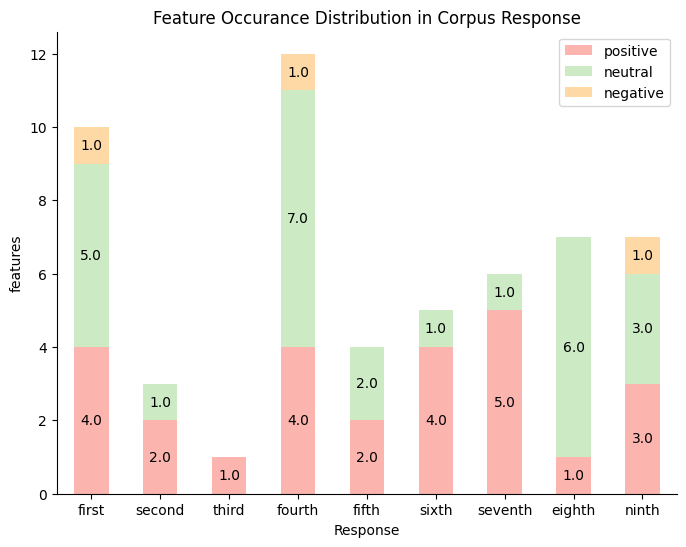

In [38]:
for i in range(len(dic)):
    dic[i]['positive'] = len(dic[i]['positive'])
    dic[i]['neutral'] = len(dic[i]['neutral'])
    dic[i]['negative'] = len(dic[i]['negative'])
    
new_dic = {}

for i in range(len(dic)):
    new_dic[lst[i]] = dic[i]
    
x = np.arange(1, len(lst)+1)
df = pd.DataFrame(new_dic)
colors = plt.cm.Pastel1(np.linspace(0, 2, 10))
ax = df.T.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Response', ylabel='features', color=colors)

for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_title('Feature Occurance Distribution in Corpus Response')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [39]:
import personal_classifier as pc

# implement personal_calssifier.py and predict
clf = pc.ResponseClassifier()
clf.train(data)
clf.predict(corpus)

[1, 0, 0, 1, 1, 0, 0, 1, 1]